<a href="https://colab.research.google.com/github/hhk54250/20MA573-HHK/blob/master/hw3/bsm%20price%20change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])

In [0]:
import numpy as np
import scipy.stats as ss

In [0]:
class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio

In [0]:
def bsm_price(self, vanilla_option):
    s0 = self.init_state
    sigma = self.vol_ratio
    r = self.drift_ratio
    
    otype = vanilla_option.otype
    k = vanilla_option.strike
    maturity = vanilla_option.maturity
    
    d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
          * maturity) / (sigma * np.sqrt(maturity))
    d2 = d1 - sigma * np.sqrt(maturity)
    
    return (otype * s0 * ss.norm.cdf(otype * d1) #line break needs parenthesis
            - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))

Gbm.bsm_price = bsm_price

In [0]:
import numpy as np
import matplotlib.pyplot as plt


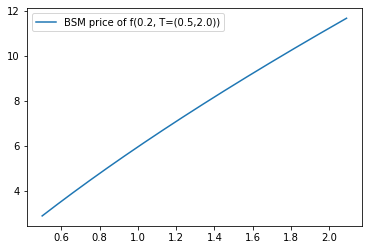

In [52]:


T = np.arange(0.5,2.1,0.01)
gbm = Gbm()
option = VanillaOption(maturity=T)
BS_price = gbm.bsm_price(option)

plt.plot(T, BS_price, label = 'BSM price of f(0.2, T=(0.5,2.0))')
plt.legend()

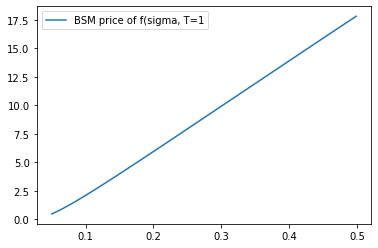

In [53]:
sigma = np.arange(0.05,0.5,0.001)
gbm = Gbm(100,.0475,sigma)
option = VanillaOption(maturity=1)
BS_price = gbm.bsm_price(option)

plt.plot(sigma, BS_price, label = 'BSM price of f(sigma, T=1')
plt.legend()

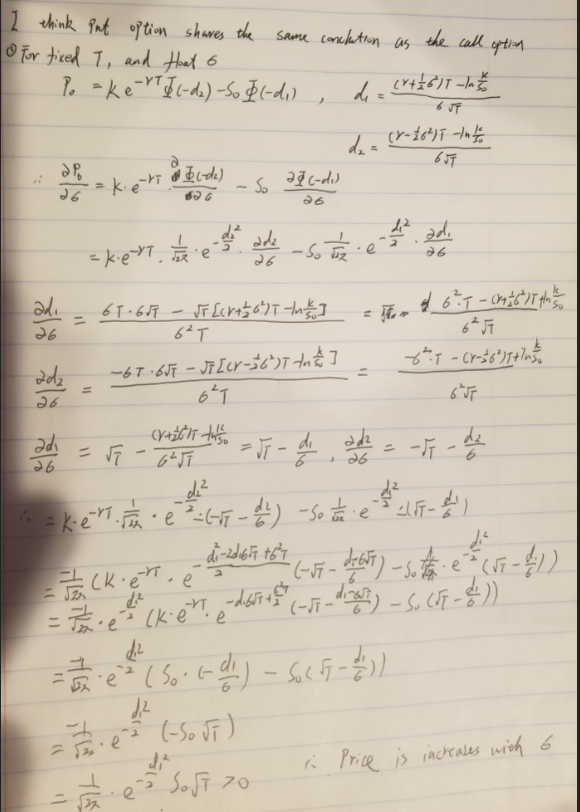